<a href="https://colab.research.google.com/github/gsalgadod/Ejercicios-Varios/blob/main/Ejercicio_de_Visualizaci%C3%B3n_de_Datos_(pr%C3%A1ctica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio de visualización de datos (práctica)
Makeover Monday ofrece un desafío semanal para reconstruir o mejorar la visualización de datos. La tarea es elegir una de las visualizaciones de datos para reconstruir o mejorarlas. 

Para hacer esto: 

1. Se elige un conjunto de datos.
2. Usen Python para limpiar los datos y crear una visualización de los mismos.


# Dataset escogido
Para la realización de esta tarea se escoge utilizar un dataset con el porcentaje de mujeres que ocupan cargos en el parlamento europeo y en el parlamento de los diferentes países que componen la union europea desde el 2003 en adelante. 

Los datos están en [Eurostat](https://ec.europa.eu/eurostat/databrowser/view/sdg_05_50/default/table?lang=en)

Los datos descargados están en un archivo excel, pero hay que darles formato para poder utilizarlos como dataframe. Este formato incluye:

1. Establecer en qué hoja del archivo excel está el dataframe a utilizar.
2. Definir en que parte de la hoja de excel están los datos (los datos no parten en la primera fila).
3. Eliminar columnas y filas que no son útiles. El dataset tiene una serie de columnas sin nombre que no contienen información y algunas filas que no sirven. 

In [245]:
#Carga de datos
filename = "/content/drive/MyDrive/Coding Dojo/Data Frames/Seats held by women in national parliaments and goverments.xlsx"
df = pd.read_excel(filename, sheet_name = 2, header = 9) #El dataframe está en la hoja 3 (índice 2) del archivo excel y los datos parten en la fila 10 (índice 9)
df.head(5)

,TIME,2003,Unnamed: 2,2004,Unnamed: 4,2005,Unnamed: 6,2006,Unnamed: 8,2007,...,Unnamed: 28,2017,Unnamed: 30,2018,Unnamed: 32,2019,Unnamed: 34,2020,Unnamed: 36,2021
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),21.1,d,21.4,NaN,21.9,NaN,22.2,NaN,23.0,...,NaN,30.0,NaN,30.9,NaN,32.1,NaN,32.7,NaN,33.1
2,European Union - 28 countries (2013-2020),20.5,d,20.9,NaN,21.5,NaN,21.7,NaN,22.5,...,NaN,29.8,NaN,30.6,NaN,31.7,NaN,:,NaN,:
3,Belgium,34.2,d,35.6,NaN,35.9,NaN,36.5,NaN,35.9,...,NaN,40.7,NaN,39.5,NaN,42.4,NaN,43.3,NaN,43.8
4,Bulgaria,25.9,d,28.0,NaN,21.3,NaN,21.3,NaN,21.8,...,NaN,25.9,NaN,25.4,NaN,27.1,NaN,27.1,NaN,24.6


#Eliminación de filas y columnas que no se utilizarán

Primero se eliminan las filas que no contienen información



In [246]:
filas_eliminar = [0,42,43,44,45,46] #Lista con las filas que se quieren eliminar
df.drop(index = filas_eliminar, inplace = True) #Comando para eliminar las filas
df.head(10)


,TIME,2003,Unnamed: 2,2004,Unnamed: 4,2005,Unnamed: 6,2006,Unnamed: 8,2007,...,Unnamed: 28,2017,Unnamed: 30,2018,Unnamed: 32,2019,Unnamed: 34,2020,Unnamed: 36,2021
1,European Union - 27 countries (from 2020),21.1,d,21.4,NaN,21.9,NaN,22.2,NaN,23.0,...,NaN,30.0,NaN,30.9,NaN,32.1,NaN,32.7,NaN,33.1
2,European Union - 28 countries (2013-2020),20.5,d,20.9,NaN,21.5,NaN,21.7,NaN,22.5,...,NaN,29.8,NaN,30.6,NaN,31.7,NaN,:,NaN,:
3,Belgium,34.2,d,35.6,NaN,35.9,NaN,36.5,NaN,35.9,...,NaN,40.7,NaN,39.5,NaN,42.4,NaN,43.3,NaN,43.8
4,Bulgaria,25.9,d,28.0,NaN,21.3,NaN,21.3,NaN,21.8,...,NaN,25.9,NaN,25.4,NaN,27.1,NaN,27.1,NaN,24.6
5,Czechia,:,NaN,13.7,NaN,14.7,NaN,14.7,NaN,14.2,...,NaN,21.4,NaN,21.0,NaN,20.6,NaN,20.4,NaN,21.8
6,Denmark,38.2,d,37.6,NaN,40.2,NaN,39.3,NaN,37.1,...,NaN,37.4,NaN,36.3,NaN,39.7,NaN,39.7,NaN,41.3
7,Germany (until 1990 former territory of the FRG),30.9,d,30.8,NaN,30.0,NaN,31.9,NaN,31.7,...,NaN,31.7,NaN,31.4,NaN,31.7,NaN,31.4,NaN,34.5
8,Estonia,17.0,d,15.0,NaN,18.0,NaN,19.0,NaN,20.8,...,NaN,27.7,NaN,29.7,NaN,28.7,NaN,29.7,NaN,26.7
9,Ireland,13.7,d,12.9,NaN,14.3,NaN,12.9,NaN,15.5,...,NaN,24.3,NaN,24.3,NaN,24.3,NaN,27.3,NaN,27.7
10,Greece,9.0,d,13.0,NaN,13.0,NaN,12.7,NaN,14.3,...,NaN,18.3,NaN,18.3,NaN,21.7,NaN,21.7,NaN,21.3


In [247]:
#Las columnas a eliminar tienen formato Unnamed: n, donde n es un número par que va desde el 2 al 36
#Se crea una lista con estos valores que posteriormente se le entrega al comando .drop
columnas_eliminar = [] #Se crea una lista vacía
for j in range (0,18):  #el rango va desde 0 hasta 18, este es el tamaño de la lista que se requiere
  i = j*2 + 2
  columnas_eliminar.insert(j,"Unnamed: " + str(i)) #Se agregan los elementos que se requieren eliminar
 
columnas_eliminar

['Unnamed: 2',
 'Unnamed: 4',
 'Unnamed: 6',
 'Unnamed: 8',
 'Unnamed: 10',
 'Unnamed: 12',
 'Unnamed: 14',
 'Unnamed: 16',
 'Unnamed: 18',
 'Unnamed: 20',
 'Unnamed: 22',
 'Unnamed: 24',
 'Unnamed: 26',
 'Unnamed: 28',
 'Unnamed: 30',
 'Unnamed: 32',
 'Unnamed: 34',
 'Unnamed: 36']

In [248]:
df.drop(axis = 1, labels = columnas_eliminar, inplace = True) #Se eliminan las columnas
df.head() #Se verifica que efectivamente se eliminen

,TIME,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,European Union - 27 countries (from 2020),21.1,21.4,21.9,22.2,23.0,23.8,24.0,24.0,23.9,25.9,27.3,27.8,28.2,28.4,30.0,30.9,32.1,32.7,33.1
2,European Union - 28 countries (2013-2020),20.5,20.9,21.5,21.7,22.5,23.2,23.4,23.6,23.6,25.3,26.7,27.2,28.0,28.2,29.8,30.6,31.7,:,:
3,Belgium,34.2,35.6,35.9,36.5,35.9,38.9,39.8,38.8,39.3,40.1,39.7,41.1,41.4,41.6,40.7,39.5,42.4,43.3,43.8
4,Bulgaria,25.9,28.0,21.3,21.3,21.8,21.7,21.7,22.1,22.1,23.0,24.6,20.4,19.6,19.2,25.9,25.4,27.1,27.1,24.6
5,Czechia,:,13.7,14.7,14.7,14.2,14.9,17.9,20.7,21.3,20.3,18.9,19.2,19.6,20.3,21.4,21.0,20.6,20.4,21.8


#Consideración importante

Considerando que el objetivo principal de este ejercicio es graficar los datos, se decide eliminar las filas cuyos datos no están completos. 

In [249]:
#Para realizar esta tarea, se crea una lista que almacena todos los ínidices de aquellas filas que tienen un ":" en sus datos
borrar = [] #Se crea una lista vacía
for i in range (0,41): #Se recorren todas las filas del dataset
  arreglo = df.iloc[i,:].values #Se crea un arreglo temporal con todos los datos de la fila
  if ":" in arreglo: #Si se tiene ":" en el arreglo, se almacena el ínidice correspondiente
    borrar.append(i+1)
borrar #Arreglo con los índices de las filas que se van a eliminar

[2, 5, 13, 17, 20, 23, 33, 35, 36, 37, 38, 39, 40, 41]

In [250]:
df.drop(labels = borrar, inplace = True) #Se borran las filas previamente definidas
df #Se verifica que haya funcionado.


,TIME,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,European Union - 27 countries (from 2020),21.1,21.4,21.9,22.2,23.0,23.8,24.0,24.0,23.9,25.9,27.3,27.8,28.2,28.4,30.0,30.9,32.1,32.7,33.1
3,Belgium,34.2,35.6,35.9,36.5,35.9,38.9,39.8,38.8,39.3,40.1,39.7,41.1,41.4,41.6,40.7,39.5,42.4,43.3,43.8
4,Bulgaria,25.9,28.0,21.3,21.3,21.8,21.7,21.7,22.1,22.1,23.0,24.6,20.4,19.6,19.2,25.9,25.4,27.1,27.1,24.6
6,Denmark,38.2,37.6,40.2,39.3,37.1,38.0,38.5,37.6,39.1,40.8,38.0,38.5,37.4,37.4,37.4,36.3,39.7,39.7,41.3
7,Germany (until 1990 former territory of the FRG),30.9,30.8,30.0,31.9,31.7,30.7,31.4,31.5,32.4,32.5,35.7,36.6,36.2,37.1,31.7,31.4,31.7,31.4,34.5
8,Estonia,17.0,15.0,18.0,19.0,20.8,20.8,21.8,22.8,19.8,21.0,17.8,19.8,25.7,25.7,27.7,29.7,28.7,29.7,26.7
9,Ireland,13.7,12.9,14.3,12.9,15.5,15.0,16.3,15.5,19.0,18.9,19.9,19.9,20.1,24.3,24.3,24.3,24.3,27.3,27.7
10,Greece,9.0,13.0,13.0,12.7,14.3,16.0,17.0,17.0,17.3,21.0,21.0,21.0,19.7,18.3,18.3,18.3,21.7,21.7,21.3
11,Spain,28.6,31.6,31.0,30.7,31.7,33.3,33.8,34.6,28.7,37.2,37.2,37.7,39.9,38.3,38.8,39.5,41.9,42.2,41.1
12,France,11.6,14.1,15.9,14.7,18.3,19.8,20.0,20.4,20.3,24.6,24.8,26.0,26.3,26.2,36.3,37.0,37.1,38.6,39.1


Para tener un mejor manejo de los datos a graficar, se transpone el dataframe.

In [251]:
df2 = df.transpose()
df2

,1,3,4,6,7,8,9,10,11,12,...,24,25,26,27,28,29,30,31,32,34
TIME,European Union - 27 countries (from 2020),Belgium,Bulgaria,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,...,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Liechtenstein,Norway,United Kingdom
2003,21.1,34.2,25.9,38.2,30.9,17.0,13.7,9.0,28.6,11.6,...,20.5,10.3,11.7,18.7,37.2,45.0,35.5,12.5,36.8,17.2
2004,21.4,35.6,28.0,37.6,30.8,15.0,12.9,13.0,31.6,14.1,...,19.7,10.5,11.2,16.8,38.2,47.9,30.6,12.5,38.0,17.9
2005,21.9,35.9,21.3,40.2,30.0,18.0,14.3,13.0,31.0,15.9,...,25.3,10.7,11.7,17.4,38.2,48.9,32.8,25.0,35.5,19.1
2006,22.2,36.5,21.3,39.3,31.9,19.0,12.9,12.7,30.7,14.7,...,24.9,10.5,11.7,20.8,38.2,47.4,33.9,25.0,34.7,19.1
2007,23.0,35.9,21.8,37.1,31.7,20.8,15.5,14.3,31.7,18.3,...,28.7,9.4,9.4,18.7,41.5,47.3,31.7,24.0,34.9,19.6
2008,23.8,38.9,21.7,38.0,30.7,20.8,15.0,16.0,33.3,19.8,...,28.7,10.4,10.0,18.7,41.3,46.4,33.3,24.0,36.1,19.6
2009,24.0,39.8,21.7,38.5,31.4,21.8,16.3,17.0,33.8,20.0,...,29.6,9.8,11.5,18.0,40.0,46.4,42.9,28.0,38.5,19.9
2010,24.0,38.8,22.1,37.6,31.5,22.8,15.5,17.0,34.6,20.4,...,30.4,9.8,11.7,16.0,39.5,45.6,41.3,24.0,39.1,21.5
2011,23.9,39.3,22.1,39.1,32.4,19.8,19.0,17.3,28.7,20.3,...,29.1,9.6,12.3,16.0,42.5,45.0,38.7,24.0,39.6,22.0


Al trasponer los datos, los nombres de las columnas pasan a ser los ínidices de las filas, esto se resuelve a continuación.

In [252]:
#Se crea un arreglo con los nombres de las columnas, estos nombres están en la fila 0 del dataset.
columnas = df2.iloc[0].values
columnas

array(['European Union - 27 countries (from 2020)', 'Belgium', 'Bulgaria',
       'Denmark', 'Germany (until 1990 former territory of the FRG)',
       'Estonia', 'Ireland', 'Greece', 'Spain', 'France', 'Italy',
       'Cyprus', 'Latvia', 'Luxembourg', 'Hungary', 'Netherlands',
       'Austria', 'Portugal', 'Romania', 'Slovenia', 'Slovakia',
       'Finland', 'Sweden', 'Iceland', 'Liechtenstein', 'Norway',
       'United Kingdom'], dtype=object)

In [253]:
#Se reemplazan los nombres obtenidos al trasponer el dataframe por los obtenidos previamente.
df2.set_axis(columnas, axis = 1, inplace =  True)
df2

,European Union - 27 countries (from 2020),Belgium,Bulgaria,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,...,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Liechtenstein,Norway,United Kingdom
TIME,European Union - 27 countries (from 2020),Belgium,Bulgaria,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,...,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Liechtenstein,Norway,United Kingdom
2003,21.1,34.2,25.9,38.2,30.9,17.0,13.7,9.0,28.6,11.6,...,20.5,10.3,11.7,18.7,37.2,45.0,35.5,12.5,36.8,17.2
2004,21.4,35.6,28.0,37.6,30.8,15.0,12.9,13.0,31.6,14.1,...,19.7,10.5,11.2,16.8,38.2,47.9,30.6,12.5,38.0,17.9
2005,21.9,35.9,21.3,40.2,30.0,18.0,14.3,13.0,31.0,15.9,...,25.3,10.7,11.7,17.4,38.2,48.9,32.8,25.0,35.5,19.1
2006,22.2,36.5,21.3,39.3,31.9,19.0,12.9,12.7,30.7,14.7,...,24.9,10.5,11.7,20.8,38.2,47.4,33.9,25.0,34.7,19.1
2007,23.0,35.9,21.8,37.1,31.7,20.8,15.5,14.3,31.7,18.3,...,28.7,9.4,9.4,18.7,41.5,47.3,31.7,24.0,34.9,19.6
2008,23.8,38.9,21.7,38.0,30.7,20.8,15.0,16.0,33.3,19.8,...,28.7,10.4,10.0,18.7,41.3,46.4,33.3,24.0,36.1,19.6
2009,24.0,39.8,21.7,38.5,31.4,21.8,16.3,17.0,33.8,20.0,...,29.6,9.8,11.5,18.0,40.0,46.4,42.9,28.0,38.5,19.9
2010,24.0,38.8,22.1,37.6,31.5,22.8,15.5,17.0,34.6,20.4,...,30.4,9.8,11.7,16.0,39.5,45.6,41.3,24.0,39.1,21.5
2011,23.9,39.3,22.1,39.1,32.4,19.8,19.0,17.3,28.7,20.3,...,29.1,9.6,12.3,16.0,42.5,45.0,38.7,24.0,39.6,22.0


In [254]:
# Se elimina la fila que contenía el nombre de las columnas (fila con ínidice = 0)
df2.drop (axis = 0, labels = "TIME", inplace = True) 
df2.head()

,European Union - 27 countries (from 2020),Belgium,Bulgaria,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,...,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Liechtenstein,Norway,United Kingdom
2003,21.1,34.2,25.9,38.2,30.9,17.0,13.7,9.0,28.6,11.6,...,20.5,10.3,11.7,18.7,37.2,45.0,35.5,12.5,36.8,17.2
2004,21.4,35.6,28.0,37.6,30.8,15.0,12.9,13.0,31.6,14.1,...,19.7,10.5,11.2,16.8,38.2,47.9,30.6,12.5,38.0,17.9
2005,21.9,35.9,21.3,40.2,30.0,18.0,14.3,13.0,31.0,15.9,...,25.3,10.7,11.7,17.4,38.2,48.9,32.8,25.0,35.5,19.1
2006,22.2,36.5,21.3,39.3,31.9,19.0,12.9,12.7,30.7,14.7,...,24.9,10.5,11.7,20.8,38.2,47.4,33.9,25.0,34.7,19.1
2007,23.0,35.9,21.8,37.1,31.7,20.8,15.5,14.3,31.7,18.3,...,28.7,9.4,9.4,18.7,41.5,47.3,31.7,24.0,34.9,19.6


In [255]:
#Finalmente se cambia el nombre de dos columnas para hacerlo más amigable a la vista.
diccionario = {"European Union - 27 countries (from 2020)": "European Union", "Germany (until 1990 former territory of the FRG)":"Germany"}
df2.rename(columns = diccionario, inplace = True)
df2

,European Union,Belgium,Bulgaria,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Liechtenstein,Norway,United Kingdom
2003,21.1,34.2,25.9,38.2,30.9,17.0,13.7,9.0,28.6,11.6,...,20.5,10.3,11.7,18.7,37.2,45.0,35.5,12.5,36.8,17.2
2004,21.4,35.6,28.0,37.6,30.8,15.0,12.9,13.0,31.6,14.1,...,19.7,10.5,11.2,16.8,38.2,47.9,30.6,12.5,38.0,17.9
2005,21.9,35.9,21.3,40.2,30.0,18.0,14.3,13.0,31.0,15.9,...,25.3,10.7,11.7,17.4,38.2,48.9,32.8,25.0,35.5,19.1
2006,22.2,36.5,21.3,39.3,31.9,19.0,12.9,12.7,30.7,14.7,...,24.9,10.5,11.7,20.8,38.2,47.4,33.9,25.0,34.7,19.1
2007,23.0,35.9,21.8,37.1,31.7,20.8,15.5,14.3,31.7,18.3,...,28.7,9.4,9.4,18.7,41.5,47.3,31.7,24.0,34.9,19.6
2008,23.8,38.9,21.7,38.0,30.7,20.8,15.0,16.0,33.3,19.8,...,28.7,10.4,10.0,18.7,41.3,46.4,33.3,24.0,36.1,19.6
2009,24.0,39.8,21.7,38.5,31.4,21.8,16.3,17.0,33.8,20.0,...,29.6,9.8,11.5,18.0,40.0,46.4,42.9,28.0,38.5,19.9
2010,24.0,38.8,22.1,37.6,31.5,22.8,15.5,17.0,34.6,20.4,...,30.4,9.8,11.7,16.0,39.5,45.6,41.3,24.0,39.1,21.5
2011,23.9,39.3,22.1,39.1,32.4,19.8,19.0,17.3,28.7,20.3,...,29.1,9.6,12.3,16.0,42.5,45.0,38.7,24.0,39.6,22.0
2012,25.9,40.1,23.0,40.8,32.5,21.0,18.9,21.0,37.2,24.6,...,29.1,9.9,26.9,18.7,42.5,43.6,39.7,24.0,39.6,22.3


In [256]:
#Para obtener un arreglo con los nombres de los países se utiliza el siguiente código
df3 = df2.transpose()
paises = df3.index
paises

Index(['European Union', 'Belgium', 'Bulgaria', 'Denmark', 'Germany',
       'Estonia', 'Ireland', 'Greece', 'Spain', 'France', 'Italy', 'Cyprus',
       'Latvia', 'Luxembourg', 'Hungary', 'Netherlands', 'Austria', 'Portugal',
       'Romania', 'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland',
       'Liechtenstein', 'Norway', 'United Kingdom'],
      dtype='object')

# Creación de visualizaciones

Se crearán dos visualizaciones distintas. La primera de estas es un gráfico de barras horizontales con los porcentajes mínimos, promedio y máximo de participación para cada país. La segunda es una figura con gráficos de participación en el tiempo para cada país. 


In [268]:
#Se obtienen algunos parámetros estadísticos para generar un gráfico de barras.
romedios = df2.mean()
maximos = df2.max()
minimos = df2.min()

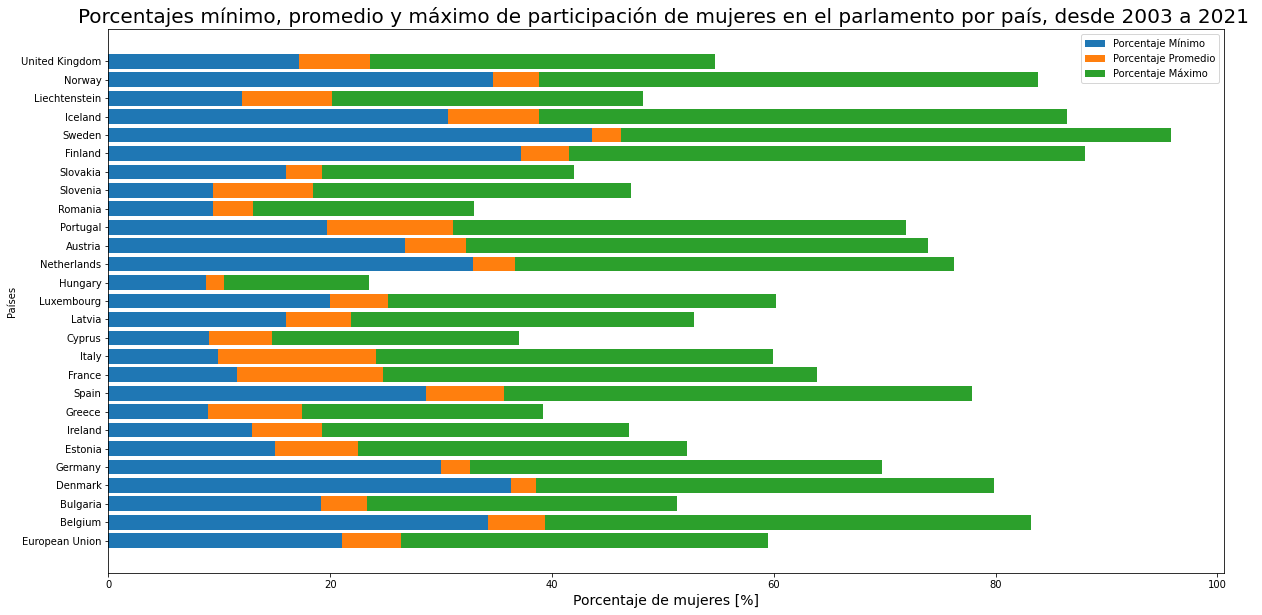

In [387]:
# Se genera un gráfico de barras horizontales con los porcentajes mínimos, promedios y máximos
fig1 = plt.figure(figsize=(20,10))

plt.barh(paises, minimos, label = "Porcentaje Mínimo")
plt.barh(paises, promedios, left = minimos, label = "Porcentaje Promedio")
plt.barh(paises, maximos, left = promedios , label = "Porcentaje Máximo")


plt.legend();
plt.xlabel("Porcentaje de mujeres [%]", fontsize = 14);
plt.ylabel("Países");
plt.title("Porcentajes mínimo, promedio y máximo de participación de mujeres en el parlamento por país, desde 2003 a 2021 ", fontsize = 20);
plt.show;


In [217]:
#Para las visualizaciones se crea un arreglo años, que contiene la variable temporal del dataframe, que será el valor del eje x de las gráficas.
años = df2.index.values
años

array(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'], dtype=object)

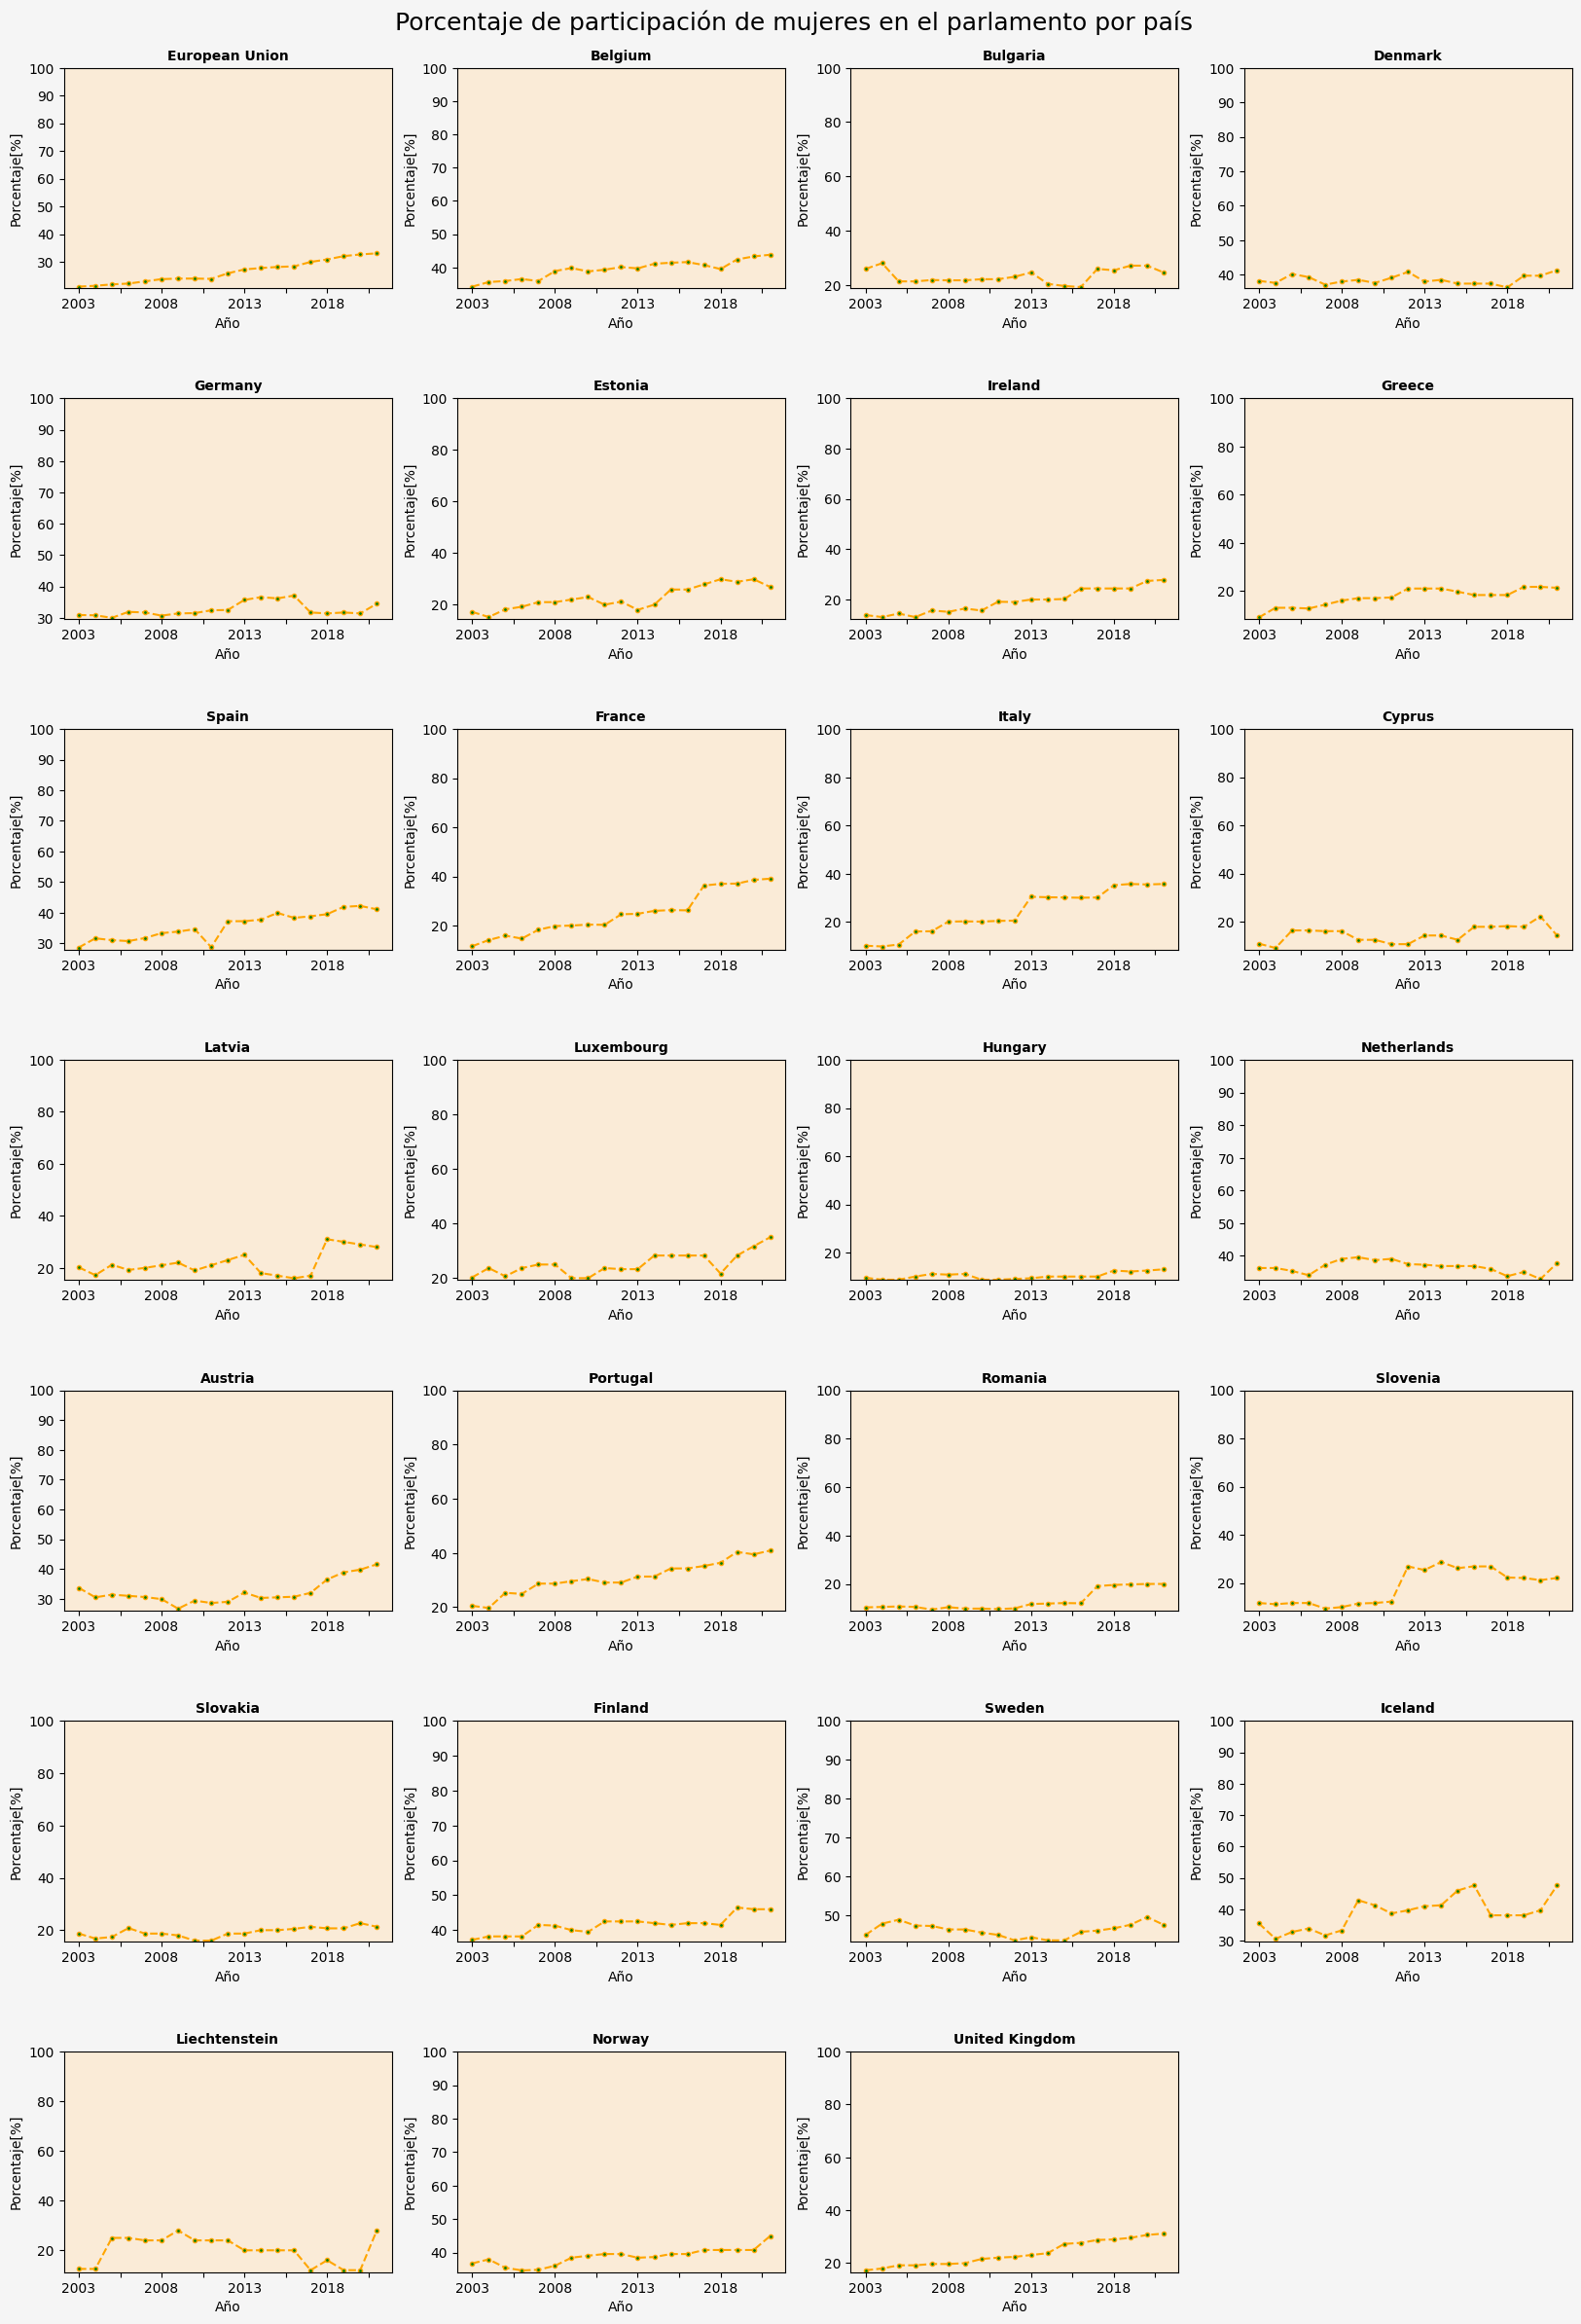

In [385]:
# A continuación se crea una figura que contenga un gráfico para cada país
plt.figure(figsize=(20, 30), dpi=100, facecolor = "whitesmoke")  #Se define la figura general
 
plt.suptitle("Porcentaje de participación de mujeres en el parlamento por país", fontsize=18, y=0.9) #Se le da nombre a la figura general
plt.subplots_adjust(hspace=0.5) #Se ajusta el espaciamiento entre sub gráficos
#Se crea un loop que recorre el arreglo paises previamente creado.
for n, pais in enumerate(paises):
    #Se va iterando y creando un nuevo subplot
    ax = plt.subplot(7, 4, n + 1)
    #Se crea cada uno de los gráficos 
    df2.iloc[:,n].plot(ax=ax, color = "orange", linestyle = "--", marker="o", markersize = 3, markerfacecolor = "green")

    #Se le agrega formato a los gráficos
    ax.set_facecolor("antiquewhite")
    ax.set_title(paises[n], fontsize = 10, fontweight ="bold")
    ax.set_ylabel("Porcentaje[%]")
    ax.set_xlabel("Año")
    ax.set_ylim(top = 100)
   

In [ ]:
[]